# Stock and Benchmark Returns Analysis

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import scipy.stats as scs
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [70]:
# input
market = "SPY"
symbol = 'TSLA'
start = '2018-01-01'
end = '2020-11-26'

# Read data 
data = yf.download(symbol,start,end)
stock_market = yf.download(market, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [71]:
from datetime import datetime

def days_between(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    n = abs((end - start).days)
    return n

days_between(start, end)

1060

In [72]:
start = datetime.strptime(start, "%Y-%m-%d")
end = datetime.strptime(end, "%Y-%m-%d")
n = abs((end - start).days)

In [73]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000


In [74]:
stock_market.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,255.195923,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,256.810028,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,257.892456,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,259.611115,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,260.085846,57319200


In [75]:
rf = 0.01

In [76]:
close_px = data[ 'Adj Close']
returns = close_px.pct_change().dropna()

In [77]:
p = np.array(data['Adj Close'])
mp = np.array(stock_market['Adj Close']) 

dollar_vol = np.array(data['Volume']*p)
market_dollar_vol = np.array(stock_market['Volume']*mp)

In [78]:
benchmark = stock_market['Adj Close'].pct_change().dropna()
excess_returns = np.array(returns) - np.array(benchmark)

In [79]:
data['returns'] = data[ 'Adj Close'].pct_change().dropna()
benchmark['returns'] = stock_market['Adj Close'].pct_change().dropna()

In [80]:
data['rea_var'] = 252 * np.cumsum(data['returns']**2) / np.arange(len(data))
data['rea_vol'] = np.sqrt(data['rea_var'])

Alpha is measure of performance on a risk-adjusted basis
Alpha also known as "Jensen index".

Beta is a measure of the volatility, or systematic risk or of a secruity or a portfolio. Beta is used in the capital asset pricing model (CAPM), a model that calculates the expected return of an asset based on its beta and expected market returns.

R-Squared is a statisitcal measure that represents the percentage of a fund or security's movements that can be explained by movements in a benchmark index (S&P 500).

In [81]:
def adj_close_statistics(close_px):
	sta = scs.describe(close_px)
	print("%14s %15s" % ('statistic', 'value'))
	print(30 * "-")
	print("%14s %15.5f" % ('size', sta[0]))
	print("%14s %15.5f" % ('min', sta[1][0]))
	print("%14s %15.5f" % ('max', sta[1][1]))
	print("%14s %15.5f" % ('mean', sta[2]))
	print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
	print("%14s %15.5f" % ('skew', sta[4]))
	print("%14s %15.5f" % ('kurtosis', sta[5]))
    
adj_close_statistics(close_px)    

     statistic           value
------------------------------
          size       732.00000
           min        35.79400
           max       574.00000
          mean       120.05023
           std       117.28466
          skew         1.92921
      kurtosis         2.48557


In [82]:
def print_stock_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(returns))
    print("Std  of Daily  Log Returns %9.6f" % np.std(returns))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(returns) * 252))
    print("Std  of Annua. Log Returns %9.6f" % (np.std(returns) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(returns))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(returns)[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(returns))
    print("Kurt Normal Test p-value   %9.6f" % \
                scs.kurtosistest(returns)[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % \
                scs.normaltest(returns)[1])
    print("---------------------------------------------")
    print("Realized Volatility        %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance          %9.6f" % data['rea_var'].iloc[-1])
    print("---------------------------------------------")
    print("Anderson Normality Test:		   ")
    print(stats.anderson(returns))
    print("---------------------------------------------")
    print("Shapiro_Wilk Test: 		      			")
    print(stats.shapiro(returns))
    print("Sharpe Ratio of Daily Returns:  			")
    print("{0:.8f}".format(np.mean(returns) / np.std(returns)))
    print("Trading Sharpe for Daily:      			")
    print("{0:.8f}".format((n*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(n*6.5))))
    print("Sharpe of Annua. Returns w/ days:      	")
    print("{0:.8f}".format((252) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252))))
    print("Sharpe of Annua. Returns w/ days & hours:")
    print("{0:.8f}".format((252*6.5) * (np.mean(returns)-rf // np.std(returns)*np.sqrt(252*6.5))))
    print("---------------------------------------------")
    print("Amihud Illiquidity 		  %9.6g" % np.mean(np.divide(abs(returns),dollar_vol[1:])))
    print("---------------------------------------------")
    print("Kelly Formula:			       ")
    print("{0:.8f}".format(np.mean(returns) - rf // (np.std(returns))**2))
    print("Compounded Levered Return: 	   ")
    print("{0:.8f}".format(rf + (((252) * (np.mean(returns)-rf / np.std(returns)*np.sqrt(252)))**2) // 2))
    print("Compounded Unlevered Return:    ")
    print("{0:.8f}".format(((np.mean(returns))*252)-(((np.std(returns))*np.sqrt(252))**2) // 2))
    return

print_stock_statistics(data)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.003931
Std  of Daily  Log Returns  0.043140
Mean of Annua. Log Returns  0.990587
Std  of Annua. Log Returns  0.684831
---------------------------------------------
Skew of Sample Log Returns  0.192555
Skew Normal Test p-value    0.033351
---------------------------------------------
Kurt of Sample Log Returns  4.222229
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.687669
Realized Variance           0.472888
---------------------------------------------
Anderson Normality Test:		   
AndersonResult(statistic=14.24863198158721, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
---------------------------------------------
Shapiro_Wilk Test: 		      			
(0.9253019094467163, 1.

In [83]:
def print_market_information(benchmark):
    print("RETURN BENCHMARK STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(benchmark['returns']))
    print("Std  of Daily  Log Returns %9.6f" % np.std(benchmark['returns']))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(benchmark['returns']) * 252))
    print("Std  of Annua. Log Returns %9.6f" % (np.std(benchmark['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(benchmark['returns']))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(benchmark['returns']))
    print("Kurt Normal Test p-value   %9.6f" % scs.kurtosistest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % scs.normaltest(benchmark['returns'])[1])
    print("---------------------------------------------")
    print("Anderson Normality Test:		   ")
    print(stats.anderson(benchmark['returns']))
    return

print_market_information(benchmark)

RETURN BENCHMARK STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000588
Std  of Daily  Log Returns  0.014582
Mean of Annua. Log Returns  0.148178
Std  of Annua. Log Returns  0.231476
---------------------------------------------
Skew of Sample Log Returns -0.685349
Skew Normal Test p-value    0.000000
---------------------------------------------
Kurt of Sample Log Returns 12.876460
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Anderson Normality Test:		   
AndersonResult(statistic=26.98282709584055, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


alpha 	=  0.003166508346528271
beta  	=  1.2999633703647282
r_squared	=  0.4393934027048774
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     174.4
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           7.37e-36
Time:                        19:14:47   Log-Likelihood:                 1338.9
No. Observations:                 731   AIC:                            -2674.
Df Residuals:                     729   BIC:                            -2665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

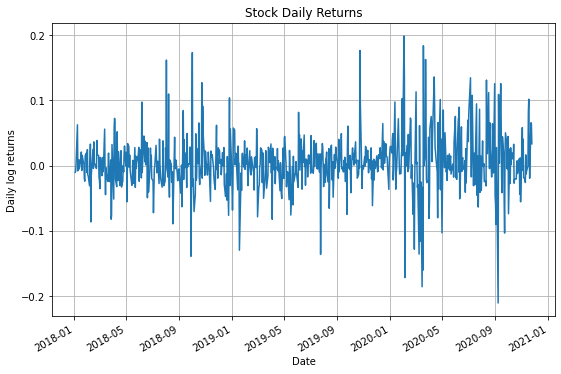

<Figure size 648x360 with 0 Axes>

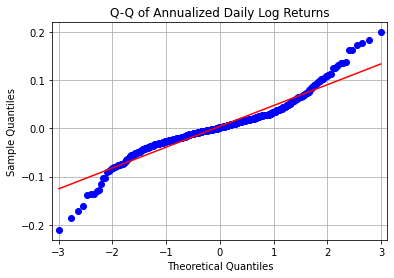

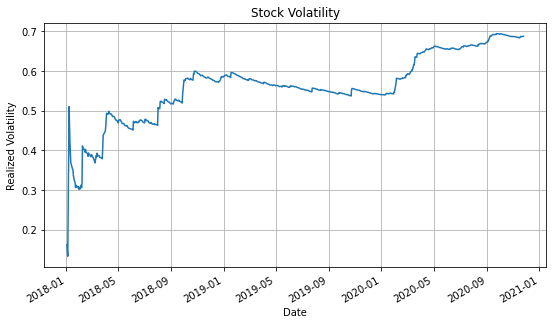

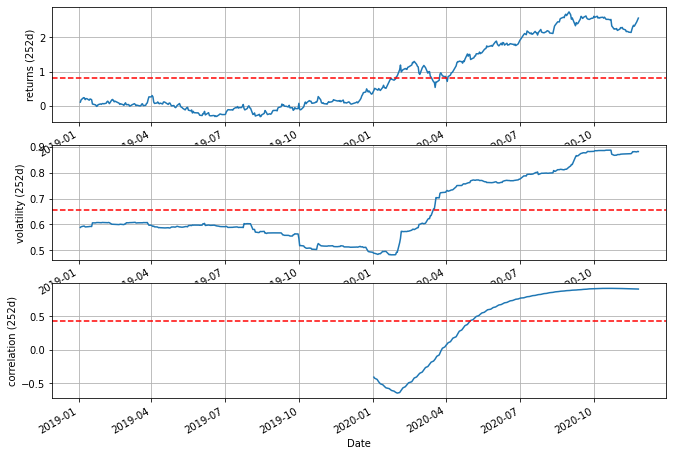

In [84]:
def linreg(returns, benchmark):
    X = benchmark
    y = returns
    beta, intercept, r_squared, p_value, std_err = stats.linregress(X, y)
    alpha = np.mean(y) - beta * np.mean(X)
    print("alpha 	= ", alpha)
    print("beta  	= ", beta)
    print("r_squared	= ", r_squared)
    return beta, alpha, r_squared

def print_market_stock(returns, benchmark):
	y = returns
	x = benchmark
	x = sm.add_constant(x)
	model = sm.OLS(y,x)
	results = model.fit()
	print(results.summary())
	
# daily quotes and log returns
def quotes_returns(returns):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    data['returns'].plot()
    plt.title('Stock Daily Returns')
    plt.ylabel('Daily log returns')
    plt.grid(True)
    plt.axis('tight')

# histogram of annualized daily log returns
def return_histogram(returns):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(returns), max(returns), 100)
    plt.hist(np.array(returns), bins=50, normed=True)
    y = dN(x, np.mean(returns), np.std(returns))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('Log Returns')
    plt.ylabel('Frequency/Probability')
    plt.grid(True)

# Q-Q plot of annualized daily log returns
def return_qqplot(returns):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(returns, line='s')
    plt.grid(True)
    plt.title('Q-Q of Annualized Daily Log Returns')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')


# realized volatility
def realized_volatility(returns):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.title('Stock Volatility')
    plt.ylabel('Realized Volatility')
    plt.grid(True)

# mean return, volatility and correlation (252 days moving = 1 year)
def rolling_statistics(returns):
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))
    
    plt.subplot(311)
    mr = returns.rolling(252).mean() * 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)

    plt.subplot(312)
    vo = returns.rolling(252).std() * math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()

    plt.subplot(313)
    co = mr.rolling(252).corr(vo, 252)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)
	
if __name__ == '__main__':
    linreg(returns, benchmark['returns'])
    print_market_stock(returns, benchmark['returns'])
    quotes_returns(returns)
    return_qqplot(returns)
    realized_volatility(returns)
    rolling_statistics(returns)